## Scrape posts starting from 2018 from instagram

In [5]:
import csv 
from itertools import islice
from math import ceil
from datetime import datetime
from itertools import dropwhile, takewhile

from instaloader import Instaloader, Profile

# function to scrape
def scrape(name, percentage):
    PROFILE = name        # profile to download from
    X_percentage = percentage    # percentage of posts that should be downloaded

    L = Instaloader()

    SINCE = datetime(2018, 1, 1)  # the date where we want to get post onwards
    
    profile = Profile.from_username(L.context, PROFILE)
    posts = profile.get_posts()
    posts = takewhile(lambda p: p.date > SINCE, posts)
    
    posts_sorted_by_likes = sorted(posts,
                                   key=lambda p: p.likes + p.comments,
                                   reverse=True)  # false means that this is in descending order

    # write the result to csv file
    with open('insta/'+PROFILE+'.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["caption","urlToPhoto","numOfLikes","numOfComments","localTime","hour"])
        for post in islice(posts_sorted_by_likes, ceil(profile.mediacount * X_percentage / 100)):
            # write the numoflikes, comments and time to csv
            writer.writerow([post.caption,post.url,post.likes, post.comments, post.date_local.strftime('%Y-%m-%d_%H-%M-%S'), int(str(post.date_local)[11:13])])

            
def main(filename):
    file = open(filename,"r")
    for line in file:
        line = line.strip()
        print("filename:",line)
        scrape(line,20)
        
    file.close()
    

## Call the function

In [6]:
main("names.txt")

filename: hanxiiaoaii
name: hanxiiaoaii
filename: syc_joycechu_
name: syc_joycechu_
filename: diorlynn
name: diorlynn
filename: changyonggggg
name: changyonggggg
filename: wshusen
name: wshusen
filename: mikowong
name: mikowong
filename: yangbaobei94
name: yangbaobei94
filename: pheiyong
name: pheiyong
filename: danny_ahboy
name: danny_ahboy
filename: jeii_pong
name: jeii_pong
filename: yvonnechua
name: yvonnechua
filename: codyhongcheeyong
name: codyhongcheeyong


## Convert UTC time to local time

In [10]:
from datetime import datetime
from dateutil import tz
ts = int("1586837095")

# METHOD 1: Hardcode zones:
from_zone = tz.gettz('UTC')
to_zone = tz.gettz('Asia/Kuala_Lumpur')

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
utc = datetime.utcfromtimestamp(ts)
print("UTC time: "+datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

utc = utc.replace(tzinfo=from_zone)
converted_time = utc.astimezone(to_zone)

print("converted time: "+converted_time.strftime('%Y-%m-%d %H:%M:%S'))

UTC time: 2020-04-14 04:04:55
converted time: 2020-04-14 12:04:55


## Scrap all posts

In [31]:
import csv 
from itertools import islice
from math import ceil
from datetime import datetime
from itertools import dropwhile, takewhile

from instaloader import Instaloader, Profile

def scrape(name):
    PROFILE = name        # profile to download from

    L = Instaloader()
    profile = Profile.from_username(L.context, PROFILE)
    posts = profile.get_posts()

    with open('total_post/'+PROFILE+'.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        print("name:",PROFILE)
        writer.writerow(["caption","urlToPhoto","numOfLikes","numOfComments","localTime","hour"])
        for post in posts:
            # write the numoflikes, comments and time to csv
            writer.writerow([post.caption,post.url,post.likes, post.comments, post.date_local.strftime('%Y-%m-%d_%H-%M-%S'), int(str(post.date_local)[11:13])])

            
def main(filename):
    file = open(filename,"r")
    for line in file:
        line = line.strip()
        print("filename:",line)
        scrape(line)
        
    file.close()

In [34]:
main("names.txt")

filename: danny_ahboy
name: danny_ahboy
filename: jeii_pong
name: jeii_pong
filename: yvonnechua
name: yvonnechua
filename: codyhongcheeyong
name: codyhongcheeyong


## Visualise data

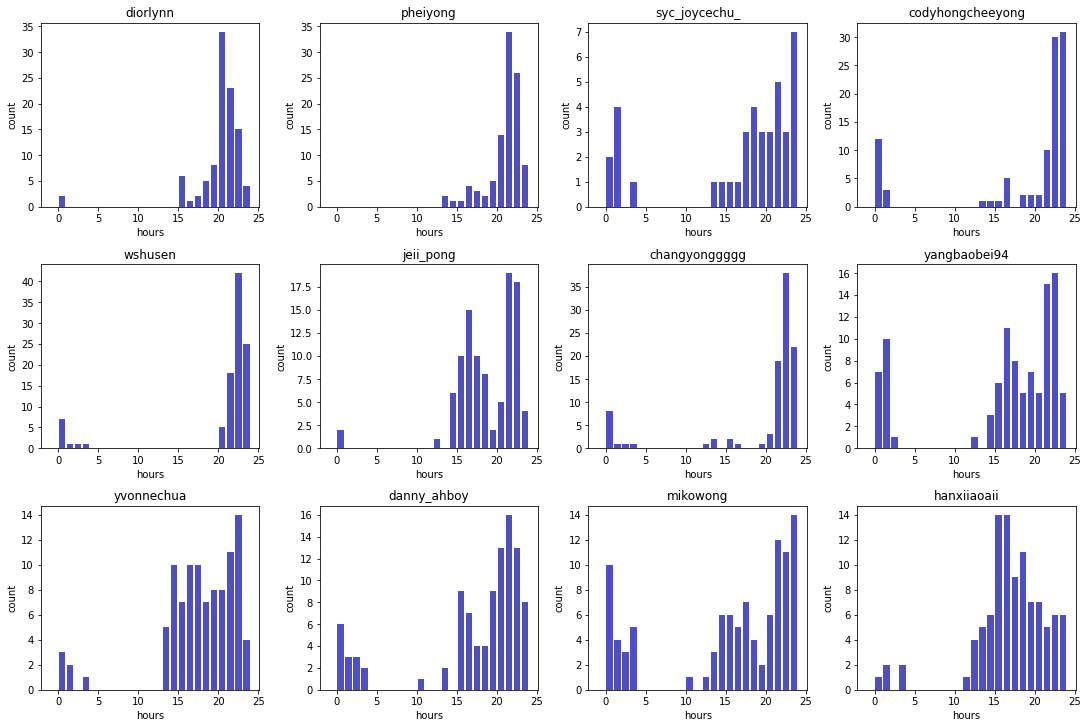

In [40]:
import pandas as pd
import os
from matplotlib import pyplot as plt
i = 0
bins=[-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
directory = r'directory'
lst = []
for filename in os.listdir(directory):
    df = pd.read_csv('insta1/'+str(filename),nrows=100)
    df = df["hour"].to_numpy()
    lst.append((filename,df))

fig5 = plt.figure(figsize=(15,10),constrained_layout=True)
spec5 = fig5.add_gridspec(ncols=4, nrows=3)
for row in range(3):
    for col in range(4):
        ax = fig5.add_subplot(spec5[row, col],label=lst[i][0])
        ax.hist(lst[i][1],bins=bins, color='#0504aa',alpha=0.7, rwidth=0.8,label=lst[i][0])
        ax.set_title(lst[i][0][:-4])
        ax.set_ylabel("count")
        ax.set_xlabel("hours")
        i+=1

## Total counts

(array([  0.,  60.,  30.,   9.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   1.,   8.,  21.,  34.,  63.,  74.,  56.,  52.,  54., 105.,
        187., 232., 138.]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Patch objects>)

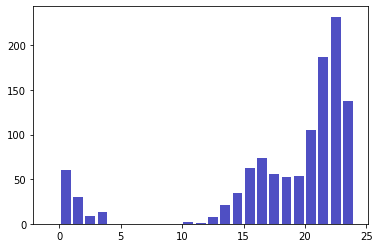

In [13]:
import numpy as np
new_lst=[]
for i in range(len(lst)):
    new_lst = np.concatenate([lst[i][1],new_lst])

plt.hist(new_lst,bins=bins, color='#0504aa',alpha=0.7, rwidth=0.8)

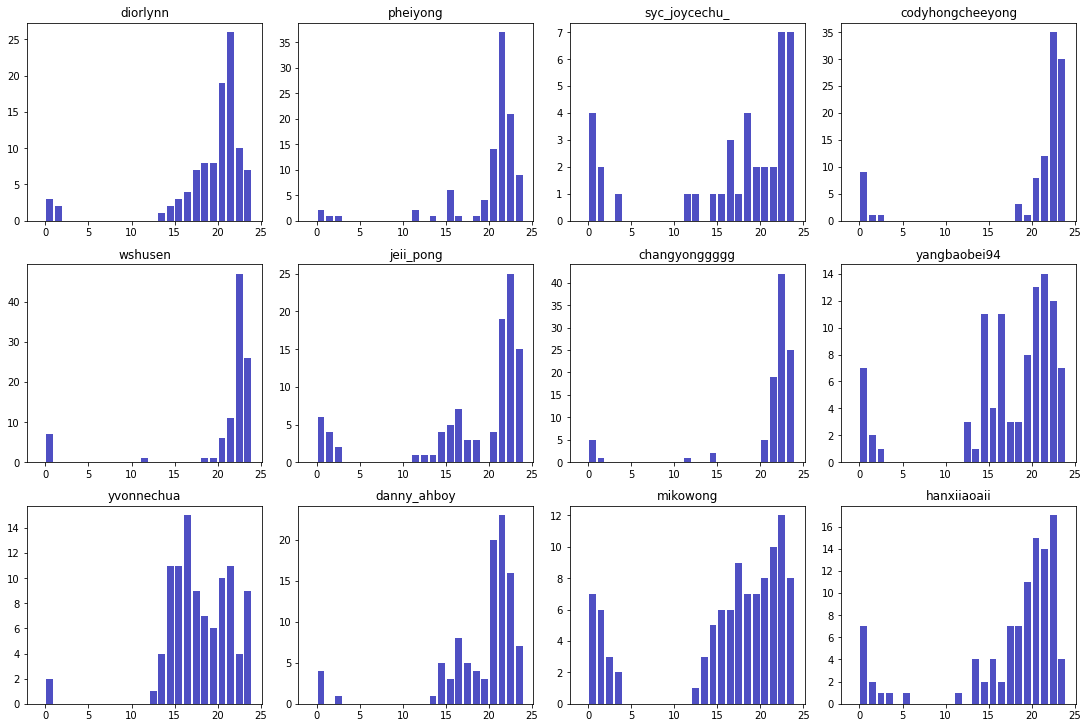

In [30]:
import pandas as pd
import os
from matplotlib import pyplot as plt
i = 0
j = 0
bins=[-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
directory = r'/Users/junyichoo/Documents/projects/lowest'
lst = []
for filename in os.listdir(directory):
    df = pd.read_csv('lowest/'+str(filename),nrows=100)
    df = df["hour"].to_numpy()
    lst.append((filename,df))

fig5 = plt.figure(figsize=(15,10),constrained_layout=True)
spec5 = fig5.add_gridspec(ncols=4, nrows=3)
for row in range(3):
    for col in range(4):
        ax = fig5.add_subplot(spec5[row, col],label=lst[i][0])
        ax.hist(lst[i][1],bins=bins, color='#0504aa',alpha=0.7, rwidth=0.8,label=lst[i][0])
        ax.set_title(lst[i][0][:-4])
        i+=1

## Total post

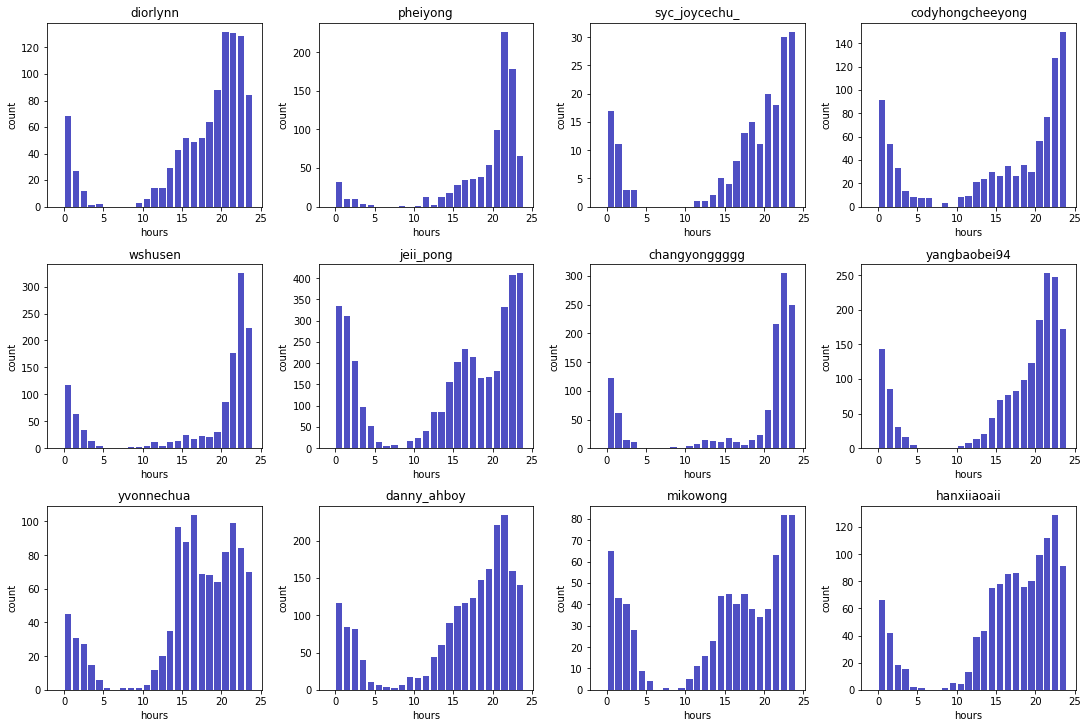

In [39]:
import pandas as pd
import os
from matplotlib import pyplot as plt
i = 0
bins=[-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
directory = r'/Users/junyichoo/Documents/projects/total_post'
lst = []
for filename in os.listdir(directory):
    df = pd.read_csv('total_post/'+str(filename))
    df = df["hour"].to_numpy()
    lst.append((filename,df))

fig5 = plt.figure(figsize=(15,10),constrained_layout=True)
spec5 = fig5.add_gridspec(ncols=4, nrows=3)
for row in range(3):
    for col in range(4):
        ax = fig5.add_subplot(spec5[row, col],label=lst[i][0])
        ax.hist(lst[i][1],bins=bins, color='#0504aa',alpha=0.7, rwidth=0.8,label=lst[i][0])
        ax.set_title(lst[i][0][:-4])
        ax.set_ylabel("count")
        ax.set_xlabel("hours")
        i+=1